In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
from patsy import dmatrices
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df  = pd.read_excel("Project 3 datasets/train.xlsx")

In [5]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
...,...,...,...,...,...,...,...,...
379331,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom
379332,539451,20749,ASSORTED COLOUR MINI CASES,1,2010-12-17 16:59:00,16.98,NaN,United Kingdom
379333,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom
379334,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom


In [6]:
df.describe

<bound method NDFrame.describe of        InvoiceNo StockCode                         Description  Quantity  \
0         558904     22292    HANGING CHICK  YELLOW DECORATION         1   
1         556072     20970  PINK FLORAL FELTCRAFT SHOULDER BAG         8   
2         551739     21559   STRAWBERRY LUNCH BOX WITH CUTLERY         2   
3         541658     21988        PACK OF 6 SKULL PAPER PLATES         1   
4         538364    85099C      JUMBO  BAG BAROQUE BLACK WHITE        10   
...          ...       ...                                 ...       ...   
379331   C554864     22962               JAM JAR WITH PINK LID        -4   
379332    539451     20749          ASSORTED COLOUR MINI CASES         1   
379333    572302     22091                   EMPIRE TISSUE BOX         1   
379334    559339     84946        ANTIQUE SILVER T-LIGHT GLASS        60   
379335    576771     23159        SET OF 5 PANCAKE DAY MAGNETS        12   

               InvoiceDate  UnitPrice  CustomerID    

In [7]:
df.shape

(379336, 8)

In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df.iloc[1:,1:]

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
5,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom
...,...,...,...,...,...,...,...
379331,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom
379332,20749,ASSORTED COLOUR MINI CASES,1,2010-12-17 16:59:00,16.98,NaN,United Kingdom
379333,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom
379334,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom


In [10]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [25]:
correlation=df.corr()

In [12]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [13]:
df.isnull().sum()/len(df)*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.253865
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.848683
Country         0.000000
dtype: float64

In [14]:
df = df.drop("CustomerID", axis=1)

In [33]:
df = df.drop("InvoiceDate", axis=1)

In [35]:
df = df.drop("Description", axis=1)

In [37]:
df["Country"] = df["Country"].astype("category")

In [40]:
df.dtypes

InvoiceNo      object
StockCode      object
Quantity        int64
UnitPrice     float64
Country      category
dtype: object

In [41]:
df.isnull().sum()/len(df)*100

InvoiceNo    0.0
StockCode    0.0
Quantity     0.0
UnitPrice    0.0
Country      0.0
dtype: float64

In [42]:
df.describe()

,Quantity,UnitPrice
count,379336.000000,379336.000000
mean,9.517272,4.681474
std,259.070548,105.799352
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [43]:
df['Quantity'].unique()

array([     1,      8,      2,     10,      4,      3,      6,     48,
           12,     24,      5,     32,     36,     20,     22,     13,
           16,     25,      7,    100,     50,     18,     72,    504,
           14,    200,      9,    240,     30,     -9,    120,    640,
          128,     15,     -1,     19,     96,     21,     35,     29,
           11,    480,    288,     40,    192,   2560,    -23,     -6,
           17,     80,     -8,    -11,    -24,     60,     -4,   -120,
          216,     -5,     26,     43,     23,     65,    -10,    576,
           31,     42,    144,     -7,     -2,     -3,    -36,    448,
          -61,     27,    108,    -20,  -1128,  -1515,    104,    -65,
          -15,    -12,    400,    -18,    720,    324,    250,     64,
           54,    312,    280,    -34,   -147,    360,   -111,     28,
          111,    -70,    300,    160,   3114,    384,    105,    -32,
           56,   -192,    102,     41,     55,    320,     37,     71,
      

In [44]:
df["UnitPrice"].unique()

array([  1.25,   3.75,   2.55, ...,  33.17, 218.64, 337.23])

In [45]:
df["Country"].unique()

['United Kingdom', 'Channel Islands', 'Poland', 'France', 'Belgium', ..., 'Brazil', 'Lebanon', 'Greece', 'RSA', 'Saudi Arabia']
Length: 38
Categories (38, object): ['United Kingdom', 'Channel Islands', 'Poland', 'France', ..., 'Lebanon', 'Greece', 'RSA', 'Saudi Arabia']

In [46]:
df["StockCode"].unique()

array([22292, 20970, 21559, ..., '85018C', 84455, 'DCGS0074'],
      dtype=object)

In [47]:
df["Description"].unique()

KeyError: 'Description'

<AxesSubplot:>

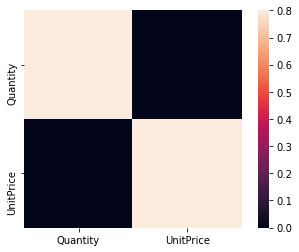

In [48]:
sns.heatmap(correlation,square=True,vmax=0.8)

In [49]:
df1  = pd.read_excel("Project 3 datasets/test.xlsx")

In [50]:
df1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,562955,84660c,PINK STITCHED WALL CLOCK,3,2011-08-11 10:14:00,7.46,NaN,United Kingdom
1,548451,22707,WRAP MONSTER FUN,50,2011-03-31 11:25:00,0.42,17365.0,United Kingdom
2,568180,22534,MAGIC DRAWING SLATE SPACEBOY,12,2011-09-25 13:42:00,0.42,15429.0,United Kingdom
3,577078,47369B,BLUE GREEN EMBROIDERY COSMETIC BAG,1,2011-11-17 15:17:00,5.79,NaN,United Kingdom
4,C569891,22720,SET OF 3 CAKE TINS PANTRY DESIGN,-2,2011-10-06 15:46:00,4.95,13924.0,United Kingdom
...,...,...,...,...,...,...,...,...
162568,574102,22866,HAND WARMER SCOTTY DOG DESIGN,24,2011-11-03 10:27:00,2.10,16128.0,United Kingdom
162569,545226,22919,HERB MARKER MINT,12,2011-03-01 09:33:00,0.65,12428.0,Finland
162570,573160,22077,6 RIBBONS RUSTIC CHARM,12,2011-10-28 08:58:00,1.95,14359.0,United Kingdom
162571,552321,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-05-09 09:15:00,0.85,17049.0,United Kingdom


In [51]:
from sklearn.cluster import KMeans

In [52]:
km = KMeans(n_clusters=2)

In [53]:
km.labels_

AttributeError: 'KMeans' object has no attribute 'labels_'

In [54]:
km.inertia_

AttributeError: 'KMeans' object has no attribute 'inertia_'